In [ ]:
# Carregando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Carregando o DATASET do Covid - 19
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
# Selecionando as colunas mais relevantes para analisar
rnr = df[['continent', 'location', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']]

In [ ]:
# Agrupando por localização e selecione valores máximos para cada métrica
dfe = rnr.groupby('location')[['continent', 'total_cases', 'total_cases_per_million', 'total_deaths', 'total_deaths_per_million', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']].max()

In [ ]:
# Resetando o Index
sd = dfe.reset_index()

In [ ]:
# Removendo indices que não serão utilizados
sm = sd.drop(index=[1, 12, 70, 71, 96, 127, 128, 162, 169, 211, 241, 251])

In [ ]:
# Redefinindo o índice e pedindo para classificar os valores para análise posterior

sn = sm.reset_index().sort_values(['continent', 'location']).reset_index()


In [ ]:
# Extraindo e pedindo para plotar o Top 10 de Paíes
top10_ca = sn.sort_values('total_cases', ascending=False).head(10)
top10_cases = top10_ca[['location', 'total_cases']].reset_index().drop('index', axis=1)

<ipython-input-10-e6bf2bc99b17>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top10_cases, palette='viridis')


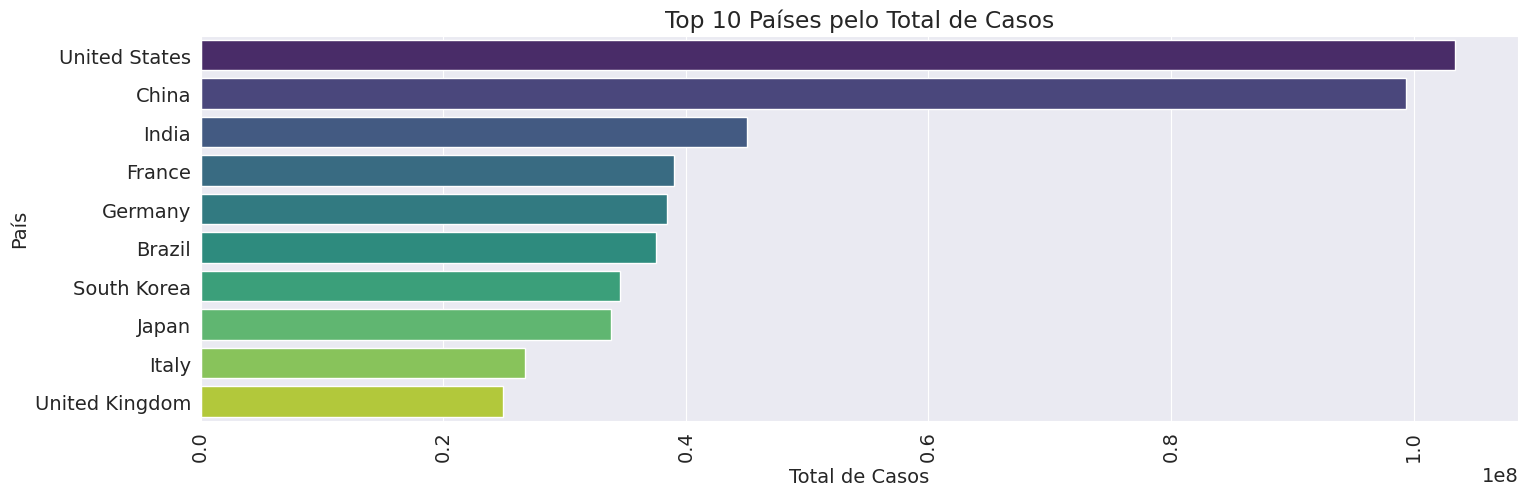

In [ ]:
# Plotando o TOP 10 de Países pelo TOTAL DE CASOS
sns.barplot(x='total_cases', y='location', data=top10_cases, palette='viridis')
plt.title('Top 10 Países pelo Total de Casos')
plt.xlabel('Total de Casos')
plt.ylabel('País')
plt.xticks(rotation=90)
plt.show()


<ipython-input-11-fbbac1ff2355>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_deaths_per_million', y='location', data=top20_deathspm, palette='inferno')


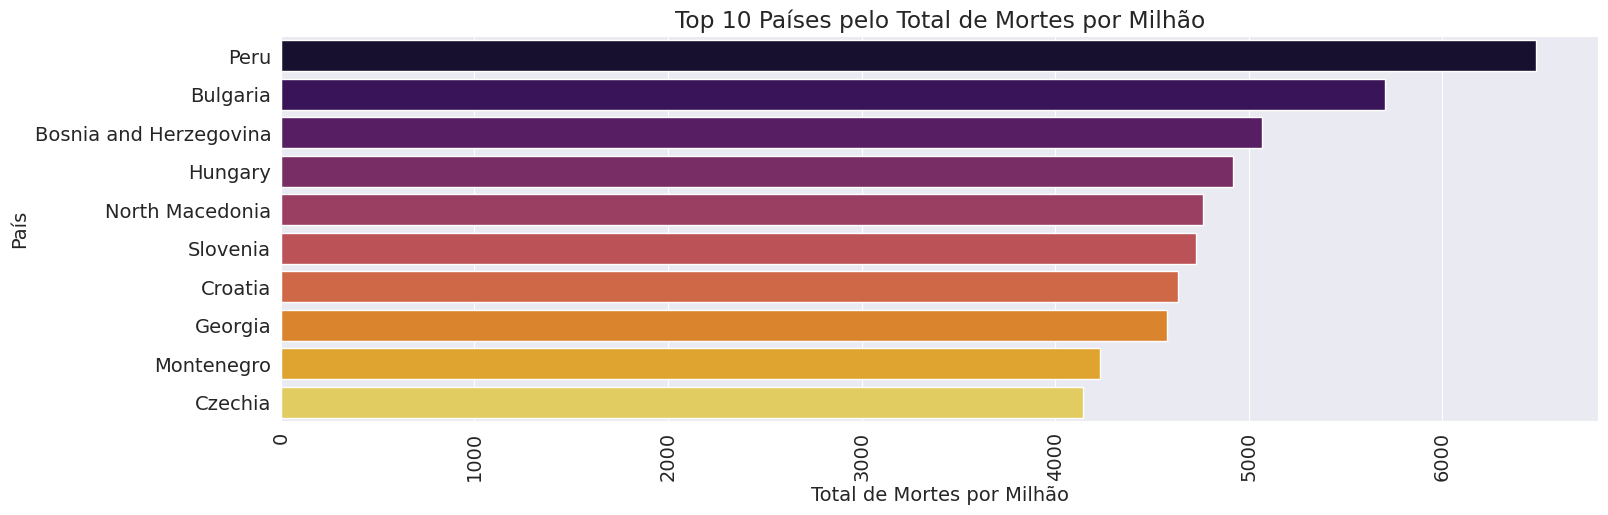

In [ ]:
# Extraindo e plotando o TOP 10 de Países pelo Total de Mortes por Milhão
top20_depm = sn.sort_values('total_deaths_per_million', ascending=False).head(10)
top20_deathspm = top20_depm[['location', 'total_deaths_per_million']].reset_index().drop('index', axis=1)

sns.barplot(x='total_deaths_per_million', y='location', data=top20_deathspm, palette='inferno')
plt.title('Top 10 Países pelo Total de Mortes por Milhão')
plt.xlabel('Total de Mortes por Milhão')
plt.ylabel('País')
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-397e727fe81c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_vaccinated', y='location', data=top20_vaccinated, palette='coolwarm')


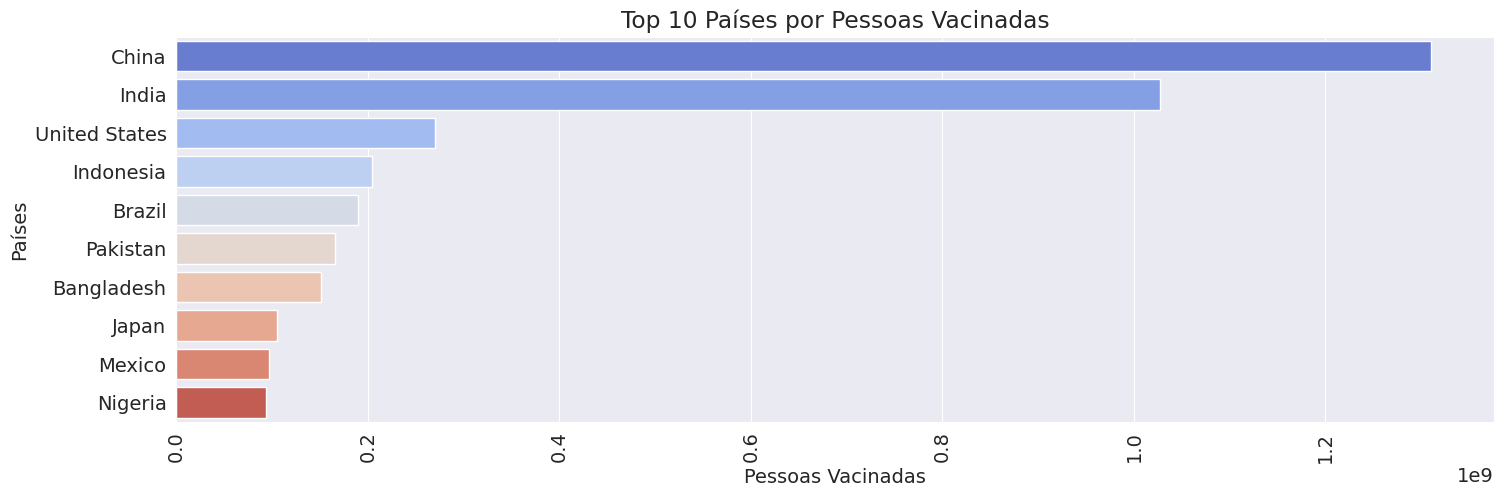

In [ ]:
# Extraindo e plotando o Top 10 de Países por Pessoas Vacinadas
top20_vac = sn.sort_values('people_vaccinated', ascending=False).head(10)
top20_vaccinated = top20_vac[['location', 'people_vaccinated']].reset_index().drop('index', axis=1)

sns.barplot(x='people_vaccinated', y='location', data=top20_vaccinated, palette='coolwarm')
plt.title('Top 10 Países por Pessoas Vacinadas')
plt.xlabel('Pessoas Vacinadas')
plt.ylabel('Países')
plt.xticks(rotation=90)
plt.show()

<ipython-input-13-0b8849794191>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_fully_vaccinated', y='location', data=top10_fullvaccinated, palette='seismic')


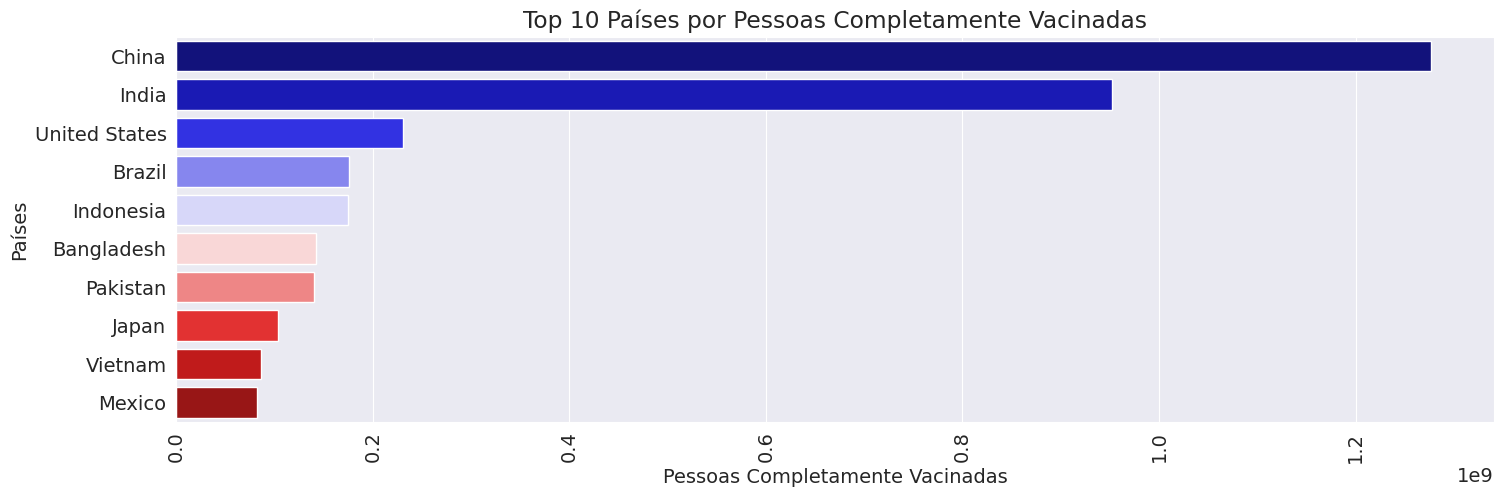

In [ ]:
# Extraindo e plotando o Top 10 de paises por pessoas completamente vacinadas
top10_fullvac = sn.sort_values('people_fully_vaccinated', ascending=False).head(10)
top10_fullvaccinated = top10_fullvac[['location', 'people_fully_vaccinated']].reset_index().drop('index', axis=1)

sns.barplot(x='people_fully_vaccinated', y='location', data=top10_fullvaccinated, palette='seismic')
plt.title('Top 10 Países por Pessoas Completamente Vacinadas')
plt.xlabel('Pessoas Completamente Vacinadas')
plt.ylabel('Países')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Plotando um gráfico para ver o Total de Casos com o decorrer do tempo
fig = px.sunburst(sn, path=['continent', 'location'], values='total_cases')
fig.update_layout(width=800, height=800, title='Total de Casos ao Longo do Tempo por Continente', title_x=0.5)
fig.show()

NameError: name 'px' is not defined